<a href="https://colab.research.google.com/github/nagendrap418/project-RELIANCE/blob/main/Reliance_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
tickers=["RELIANCE.NS"]

In [ ]:
stock_data=yf.download(tickers,start="2012-01-01")
stock_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,345.128540,351.542725,340.348846,349.957764,323.036804,8679938
2012-01-03,352.780975,360.037201,351.839905,358.922760,331.312103,9455771
2012-01-04,360.284851,362.043182,353.325836,354.712677,327.425903,8557084
2012-01-05,354.143066,359.071350,343.791199,346.465851,319.813477,13364666
2012-01-06,345.252350,358.600830,345.054230,355.406097,328.065979,9495456
...,...,...,...,...,...,...
2022-07-25,2467.449951,2467.449951,2403.000000,2420.399902,2420.399902,10665470
2022-07-26,2421.100098,2443.899902,2411.350098,2421.500000,2421.500000,5216466
2022-07-27,2419.949951,2427.000000,2402.000000,2419.199951,2419.199951,3994321


# Data understanding

In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2609 entries, 2012-01-02 to 2022-07-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2609 non-null   float64
 1   High       2609 non-null   float64
 2   Low        2609 non-null   float64
 3   Close      2609 non-null   float64
 4   Adj Close  2609 non-null   float64
 5   Volume     2609 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 142.7 KB


In [ ]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2.609000e+03
mean,1014.935238,1026.676131,1002.625463,1014.151013,998.830385,8.596785e+06
std,707.910906,716.215985,698.896879,707.165660,714.289645,6.079702e+06
min,334.330872,338.194244,333.365021,334.875702,309.114929,0.000000e+00
25%,444.783905,449.736938,439.632721,444.858185,424.691284,5.199129e+06
50%,660.241577,664.699341,652.985352,658.433716,641.576172,6.908975e+06
75%,1394.729370,1419.048828,1379.077759,1400.871094,1391.155518,9.723255e+06
max,2856.149902,2856.149902,2786.100098,2819.850098,2819.850098,6.584835e+07


**Here the Maximum value of share in Open column is 2856.149902 and minimum value 78.152176.
     the Maximum value of share in High column is 2856.149902 and minimum value 78.894859 	.
     the Maximum value of share in Low column is 2786.100098 and minimum value 77.610634.
     the Maximum value of share in Close column is 2819.850098 	 and minimum value 66.971481.**

In [ ]:
stock_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
stock_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
Skewness_df=pd.DataFrame({"Feature":["Open","High","Low","Close","Adje Close","Volume"],
                         "Skewness":[stock_data.Open.skew(),stock_data.High.skew(),stock_data.Low.skew(),
                                    stock_data.Close.skew(),stock_data["Adj Close"].skew(),stock_data.Volume.skew()]})
Skewness_df

,Feature,Skewness
0,Open,0.966620
1,High,0.965994
2,Low,0.968392
3,Close,0.967182
4,Adje Close,0.965861
5,Volume,3.593259


In [ ]:
new_stock_data=stock_data[["Close"]]
new_stock_data

,Close
Date,
2012-01-02,349.957764
2012-01-03,358.922760
2012-01-04,354.712677
2012-01-05,346.465851
2012-01-06,355.406097
...,...
2022-07-25,2420.399902
2022-07-26,2421.500000
2022-07-27,2419.199951


In [ ]:
series=new_stock_data.reset_index()
series

,Date,Close
0,2012-01-02,349.957764
1,2012-01-03,358.922760
2,2012-01-04,354.712677
3,2012-01-05,346.465851
4,2012-01-06,355.406097
...,...,...
2604,2022-07-25,2420.399902
2605,2022-07-26,2421.500000
2606,2022-07-27,2419.199951
2607,2022-07-28,2457.100098


In [ ]:
series.head()

,Date,Close
0,2012-01-02,349.957764
1,2012-01-03,358.922760
2,2012-01-04,354.712677
3,2012-01-05,346.465851
4,2012-01-06,355.406097


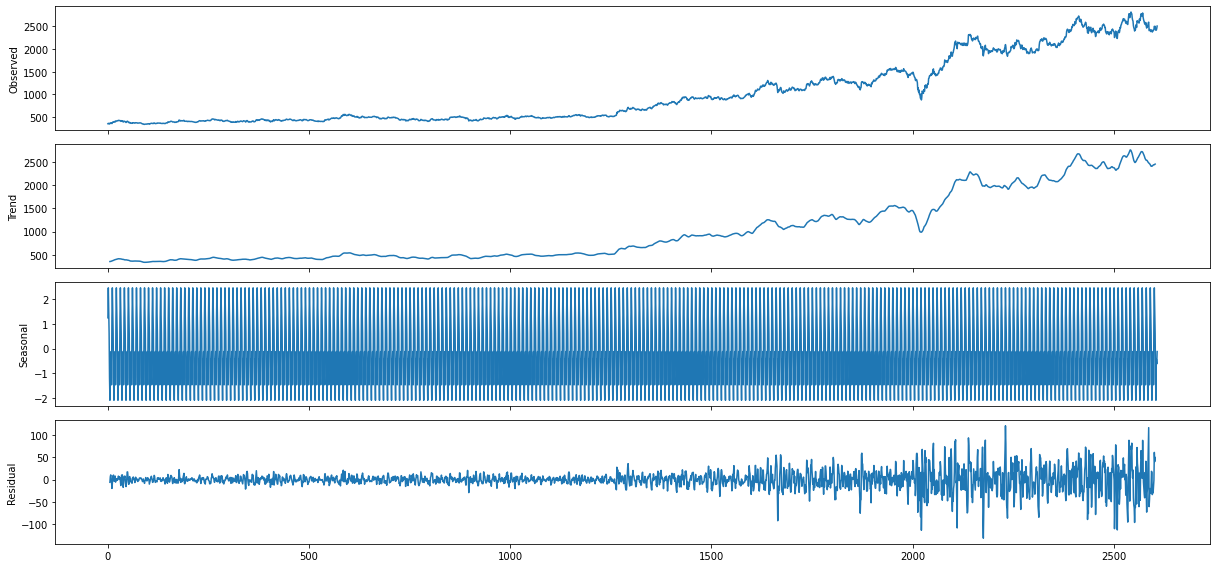

In [ ]:
rcParams['figure.figsize'] = 17,8
decomposition =seasonal_decompose(series.Close,freq=10)
fig = decomposition.plot()
plt.show()

# Visualization

In [ ]:
fig = px.line(x=series.Date,y=series.Close,labels={"x":"Date","y":"Closing price"})
fig.show()

In [ ]:
fig = px.box(x=series.Date,y=series.Close,labels={"x":"Year","y":"Closing price"})
fig.show()

In [ ]:
fig=px.bar(series,x=series.Date,y="Close")
fig.show()

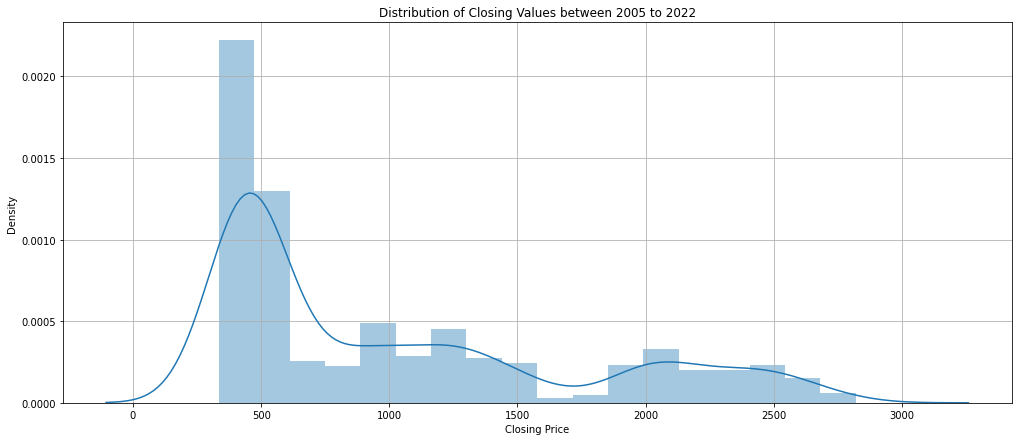

In [ ]:
plt.figure(figsize=(17,7))
sns.distplot(series.Close)
plt.title("Distribution of Closing Values between 2005 to 2022")
plt.xlabel("Closing Price")
plt.grid(True)
plt.show()

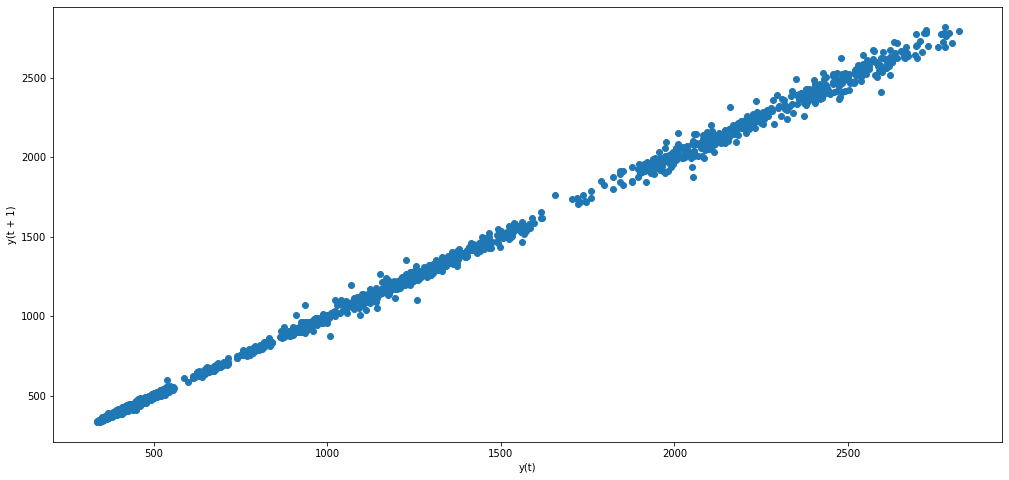

In [ ]:
lag_plot(series.Close)

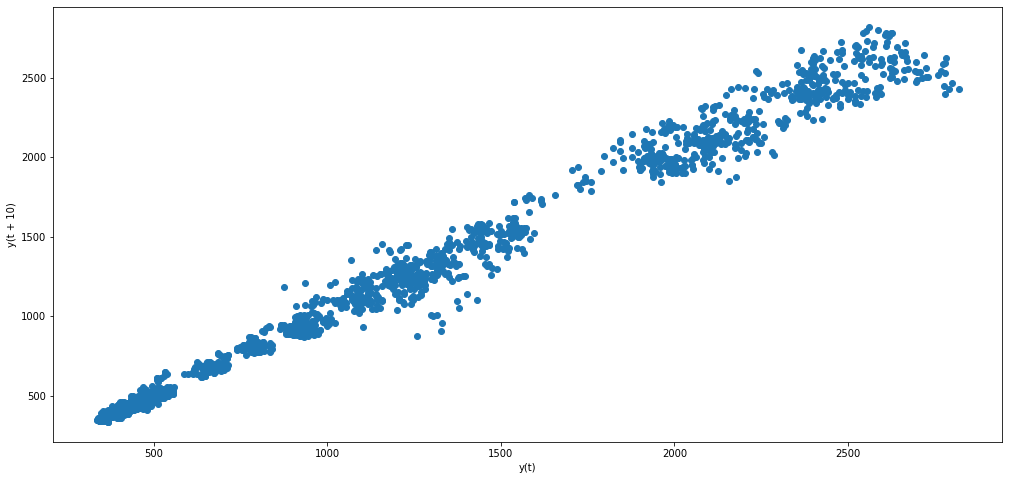

In [ ]:
lag_plot(series.Close,lag=10)

# Data Preprocessing

In [ ]:
series.shape

(2609, 2)

In [ ]:
series

,Date,Close
0,2012-01-02,349.957764
1,2012-01-03,358.922760
2,2012-01-04,354.712677
3,2012-01-05,346.465851
4,2012-01-06,355.406097
...,...,...
2604,2022-07-25,2420.399902
2605,2022-07-26,2421.500000
2606,2022-07-27,2419.199951
2607,2022-07-28,2457.100098


In [ ]:
(20/100)*len(series),(80/100)*len(series)

(521.8000000000001, 2087.2000000000003)

In [ ]:
y=np.round((20/100)*len(series),0)
y=int(y)
y

522

In [ ]:
x=np.round((80/100)*len(series),0)
x=int(x)
x

2087

In [ ]:
train=series.head(x)
test=series.tail(y)
train.shape,test.shape

((2087, 2), (522, 2))

In [ ]:
train.head()

,Date,Close
0,2012-01-02,349.957764
1,2012-01-03,358.922760
2,2012-01-04,354.712677
3,2012-01-05,346.465851
4,2012-01-06,355.406097


In [ ]:
test.head()

,Date,Close
2087,2020-06-30,1704.099976
2088,2020-07-01,1737.599976
2089,2020-07-02,1760.349976
2090,2020-07-03,1787.900024
2091,2020-07-06,1851.800049


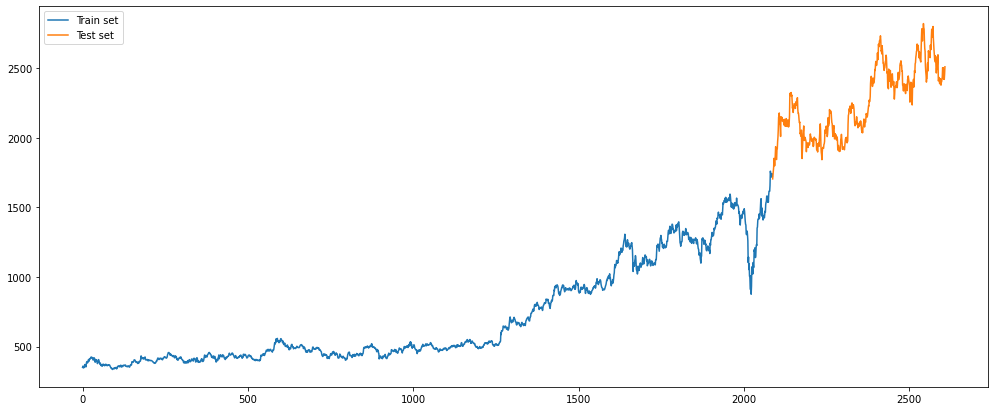

In [ ]:
plt.figure(figsize=(17,7))
plt.plot(train.Close,label="Train set")
plt.plot(test.Close,label="Test set")
plt.legend()
plt.show()

### Defining Error Functions

In [ ]:
def RMSE(actual,pred):
    temp=np.sqrt(np.mean((actual-pred)**2))
    return temp
def MAPE(pred,actual):
    temp=np.mean(np.abs((pred-actual)/actual)*100)
    return temp

* Creating moving averages

In [ ]:
moving_avg_20=series.Close.rolling(20).mean()     # mean of first 20 values and put it in 21 th observation and so on..
moving_avg_20[20]

374.17321319580077

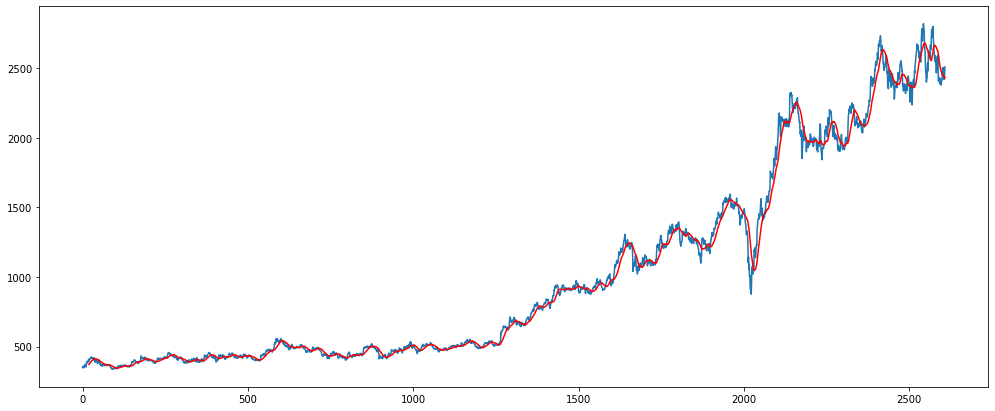

In [ ]:
plt.figure(figsize=(17,7))
plt.plot(series.Close)
plt.plot(moving_avg_20,color="red")
plt.show()

In [ ]:
train.shape,test.shape

((2087, 2), (522, 2))

In [ ]:
train

,Date,Close
0,2012-01-02,349.957764
1,2012-01-03,358.922760
2,2012-01-04,354.712677
3,2012-01-05,346.465851
4,2012-01-06,355.406097
...,...,...
2082,2020-06-23,1720.900024
2083,2020-06-24,1727.849976
2084,2020-06-25,1717.900024
2085,2020-06-26,1741.650024


In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(series[["Close"]].values)
scaled_train=scaler.fit_transform(train[["Close"]].values)
scaled_test=scaler.fit_transform(test[["Close"]].values)
scaled_train

array([[0.01058744],
       [0.01688076],
       [0.01392533],
       ...,
       [0.97086747],
       [0.9875397 ],
       [0.97455291]])

In [ ]:
len(scaled_train),len(scaled_test),len(scaled_data),scaled_data.shape

(2087, 522, 2609, (2609, 1))

In [ ]:
x_train=[]
y_train=[]

for i in range(20,len(scaled_train)):
  x_train.append(scaled_train[i-20:i])
  y_train.append(scaled_train[i,0])

x_train=np.array(x_train)
y_train=np.array(y_train)

In [ ]:
x_train

array([[[0.01058744],
        [0.01688076],
        [0.01392533],
        ...,
        [0.03993319],
        [0.05017291],
        [0.04125443]],

       [[0.01688076],
        [0.01392533],
        [0.00813615],
        ...,
        [0.05017291],
        [0.04125443],
        [0.0490255 ]],

       [[0.01392533],
        [0.00813615],
        [0.01441211],
        ...,
        [0.04125443],
        [0.0490255 ],
        [0.05392804]],

       ...,

       [[0.79842392],
        [0.79291333],
        [0.83218956],
        ...,
        [0.99069865],
        [0.97297343],
        [0.97785222]],

       [[0.79291333],
        [0.83218956],
        [0.84296507],
        ...,
        [0.97297343],
        [0.97785222],
        [0.97086747]],

       [[0.83218956],
        [0.84296507],
        [0.84714196],
        ...,
        [0.97785222],
        [0.97086747],
        [0.9875397 ]]])

In [ ]:
x_train.shape ,len(x_train)  # 1474= Rows , 20=columns because first 20 values have become columns for prediction of y_train. 1 is for univariate that is Close 

((2067, 20, 1), 2067)

## Model Building

In [ ]:
import tensorflow
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

In [ ]:
model=Sequential()
model.add(LSTM(units=50,activation="relu",return_sequences=True,input_shape=(x_train.shape[1],1)))  #x_train.shape[1]=20, 1 is for Close column
model.add(Dropout(0.1))
model.add(LSTM(units=60,activation="relu",return_sequences=True))  
model.add(Dropout(0.2))
model.add(LSTM(units=80,activation="relu",return_sequences=True))  
model.add(Dropout(0.3))
model.add(LSTM(units=120,activation="relu"))  
model.add(Dropout(0.4))
model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 20, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 20, 60)            26640     
                                                                 
 dropout_1 (Dropout)         (None, 20, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 20, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 20, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer="adam",loss="mse")
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
65/65 [==============================] - 12s 99ms/step - loss: 0.0205
Epoch 2/100
65/65 [==============================] - 7s 106ms/step - loss: 0.0045
Epoch 3/100
65/65 [==============================] - 7s 106ms/step - loss: 0.0040
Epoch 4/100
65/65 [==============================] - 6s 98ms/step - loss: 0.0034
Epoch 5/100
65/65 [==============================] - 6s 93ms/step - loss: 0.0034
Epoch 6/100
65/65 [==============================] - 4s 59ms/step - loss: 0.0037
Epoch 7/100
65/65 [==============================] - 4s 56ms/step - loss: 0.0036
Epoch 8/100
65/65 [==============================] - 4s 55ms/step - loss: 0.0031
Epoch 9/100
65/65 [==============================] - 4s 55ms/step - loss: 0.0031
Epoch 10/100
65/65 [==============================] - 4s 55ms/step - loss: 0.0030
Epoch 11/100
65/65 [==============================] - 4s 55ms/step - loss: 0.0030
Epoch 12/100
65/65 [==============================] - 4s 54ms/step - loss: 0.0025
Epoch 13/100
65/65 [==

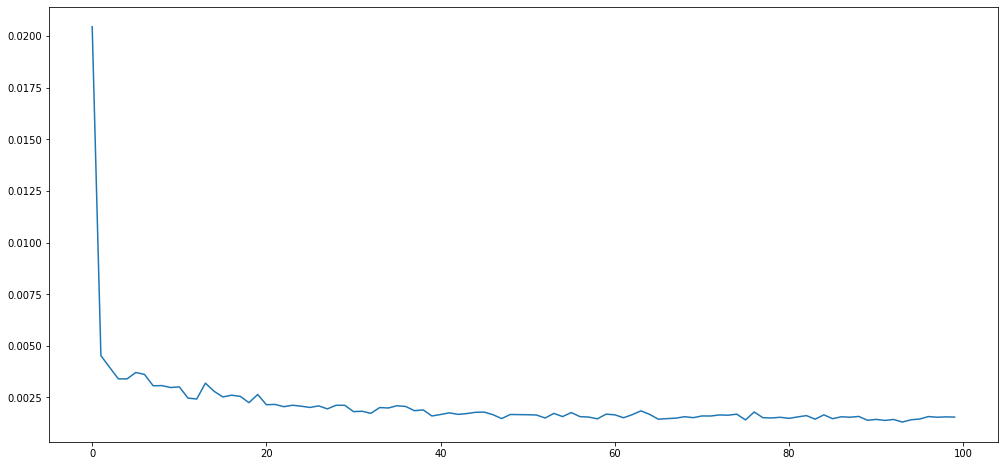

In [ ]:
loss=model.history.history["loss"]
plt.plot(loss)
plt.show()

In [ ]:
#model.save("LSTM_model")

### Testing

In [ ]:
test.head()

,Date,Close
2087,2020-06-30,1704.099976
2088,2020-07-01,1737.599976
2089,2020-07-02,1760.349976
2090,2020-07-03,1787.900024
2091,2020-07-06,1851.800049


Here for the prediction of test dataset, we need previous 50 data points so that out y will be the first value of test dataset. and that previous values are the last values of training dataset. So we have to fetch that last training values.and append it on test dataset.

In [ ]:
train.tail(20)

,Date,Close
2067,2020-06-02,1535.699951
2068,2020-06-03,1541.650024
2069,2020-06-04,1579.800049
2070,2020-06-05,1581.699951
2071,2020-06-08,1569.500000
2072,2020-06-09,1537.150024
2073,2020-06-10,1572.150024
2074,2020-06-11,1537.699951
2075,2020-06-12,1588.800049
2076,2020-06-15,1614.550049


In [ ]:
past_20_train_values=train[["Close"]].tail(20)

In [ ]:
final_df=past_20_train_values.append(test,ignore_index=True)
final_df

,Close,Date
0,1535.699951,NaT
1,1541.650024,NaT
2,1579.800049,NaT
3,1581.699951,NaT
4,1569.500000,NaT
...,...,...
537,2420.399902,2022-07-25
538,2421.500000,2022-07-26
539,2419.199951,2022-07-27
540,2457.100098,2022-07-28


In [ ]:
test.shape

(522, 2)

In [ ]:
scaled_final_test_data=scaler.fit_transform(final_df[["Close"]])
scaled_final_test_data

array([[0.        ],
       [0.00463347],
       [0.03434185],
       [0.03582136],
       [0.02632095],
       [0.00112921],
       [0.02838459],
       [0.00155745],
       [0.04135038],
       [0.06140255],
       [0.06385546],
       [0.06202548],
       [0.09360282],
       [0.17420087],
       [0.16388276],
       [0.14421995],
       [0.14963205],
       [0.14188378],
       [0.1603785 ],
       [0.14597208],
       [0.13113733],
       [0.15722462],
       [0.17494062],
       [0.19639454],
       [0.24615509],
       [0.22407816],
       [0.20425964],
       [0.22470118],
       [0.26659663],
       [0.31094499],
       [0.29692793],
       [0.240081  ],
       [0.23961378],
       [0.29280065],
       [0.29918626],
       [0.33940743],
       [0.36467702],
       [0.40657247],
       [0.47537272],
       [0.48319895],
       [0.49994154],
       [0.43682583],
       [0.44632643],
       [0.41381465],
       [0.36857065],
       [0.4788382 ],
       [0.46003188],
       [0.465

In [ ]:
len(scaled_final_test_data),scaled_final_test_data.shape

(542, (542, 1))

In [ ]:
x_test=[]
y_test=[]

for i in range(20,len(scaled_final_test_data)):
  x_test.append(scaled_final_test_data[i-20:i])
  y_test.append(scaled_final_test_data[i,0])

x_test,y_test=np.array(x_test),np.array(y_test)

In [ ]:
x_test.shape,y_test.shape

((522, 20, 1), (522,))

## Predictions

In [ ]:
y_pred_test=model.predict(x_test)
y_pred_test

array([[0.14423567],
       [0.15583283],
       [0.16620304],
       [0.1746898 ],
       [0.18167149],
       [0.1881419 ],
       [0.19264516],
       [0.19639105],
       [0.19816487],
       [0.20487477],
       [0.21395549],
       [0.22246818],
       [0.23103   ],
       [0.24021196],
       [0.24793392],
       [0.2541132 ],
       [0.2601967 ],
       [0.26800406],
       [0.2820269 ],
       [0.30997503],
       [0.35236192],
       [0.401434  ],
       [0.43334168],
       [0.44697833],
       [0.44732708],
       [0.43949157],
       [0.43157542],
       [0.42957908],
       [0.43476337],
       [0.44558293],
       [0.45478326],
       [0.46099383],
       [0.46374065],
       [0.46320575],
       [0.45994103],
       [0.4539743 ],
       [0.4485749 ],
       [0.44690138],
       [0.44580507],
       [0.44289297],
       [0.4394477 ],
       [0.43569297],
       [0.43639022],
       [0.4397189 ],
       [0.44391072],
       [0.4443791 ],
       [0.44172293],
       [0.440

In [ ]:
y_pred_test_df=pd.DataFrame(y_pred_test,columns=["y_pred_test"])
y_pred_test_df

,y_pred_test
0,0.144236
1,0.155833
2,0.166203
3,0.174690
4,0.181671
...,...
517,0.739854
518,0.737542
519,0.723345
520,0.706309


In [ ]:
original_y_pred_test=scaler.inverse_transform(y_pred_test_df)
original_y_pred_test

array([[1720.9202],
       [1735.8126],
       [1749.1296],
       [1760.0278],
       [1768.9934],
       [1777.3025],
       [1783.0853],
       [1787.8955],
       [1790.1733],
       [1798.7899],
       [1810.4509],
       [1821.3824],
       [1832.3772],
       [1844.1682],
       [1854.0842],
       [1862.0194],
       [1869.8315],
       [1879.8574],
       [1897.8649],
       [1933.7544],
       [1988.1855],
       [2051.2014],
       [2092.1758],
       [2109.6873],
       [2110.135 ],
       [2100.073 ],
       [2089.9077],
       [2087.344 ],
       [2094.0012],
       [2107.8953],
       [2119.71  ],
       [2127.685 ],
       [2131.2124],
       [2130.5256],
       [2126.3333],
       [2118.6711],
       [2111.7375],
       [2109.5884],
       [2108.1807],
       [2104.441 ],
       [2100.0166],
       [2095.195 ],
       [2096.0903],
       [2100.365 ],
       [2105.748 ],
       [2106.3494],
       [2102.9385],
       [2101.5613],
       [2102.632 ],
       [2101.138 ],


In [ ]:
y_pred_test.shape

(522, 1)

In [ ]:
y_test

array([0.13113733, 0.15722462, 0.17494062, 0.19639454, 0.24615509,
       0.22407816, 0.20425964, 0.22470118, 0.26659663, 0.31094499,
       0.29692793, 0.240081  , 0.23961378, 0.29280065, 0.29918626,
       0.33940743, 0.36467702, 0.40657247, 0.47537272, 0.48319895,
       0.49994154, 0.43682583, 0.44632643, 0.41381465, 0.36857065,
       0.4788382 , 0.46003188, 0.46598924, 0.47560638, 0.4548924 ,
       0.46575558, 0.46092752, 0.45660556, 0.45018108, 0.43269874,
       0.45388002, 0.46400345, 0.43713743, 0.42530085, 0.43612505,
       0.42549553, 0.46848112, 0.4476892 , 0.45201097, 0.4244052 ,
       0.42950589, 0.46139464, 0.44885728, 0.42171864, 0.42592368,
       0.44496366, 0.4872095 , 0.60608181, 0.61055948, 0.59716545,
       0.60985871, 0.6142974 , 0.59420625, 0.59961836, 0.56079902,
       0.52598986, 0.54129192, 0.50266708, 0.51863094, 0.52996143,
       0.55238875, 0.54405643, 0.53696996, 0.52680756, 0.52536703,
       0.56208384, 0.54787211, 0.54335547, 0.54615895, 0.58015

In [ ]:
original_y_test_df=pd.DataFrame(y_test,columns=["y_test"])
original_y_test_df

,y_test
0,0.131137
1,0.157225
2,0.174941
3,0.196395
4,0.246155
...,...
517,0.688938
518,0.689795
519,0.688004
520,0.717517


In [ ]:
original_y_test=scaler.inverse_transform(original_y_test_df)
original_y_test

array([[1704.09997559],
       [1737.59997559],
       [1760.34997559],
       [1787.90002441],
       [1851.80004883],
       [1823.44995117],
       [1798.        ],
       [1824.25      ],
       [1878.05004883],
       [1935.        ],
       [1917.        ],
       [1844.        ],
       [1843.40002441],
       [1911.69995117],
       [1919.90002441],
       [1971.55004883],
       [2004.        ],
       [2057.80004883],
       [2146.14990234],
       [2156.19995117],
       [2177.69995117],
       [2096.64990234],
       [2108.85009766],
       [2067.10009766],
       [2009.        ],
       [2150.60009766],
       [2126.44995117],
       [2134.10009766],
       [2146.44995117],
       [2119.85009766],
       [2133.80004883],
       [2127.60009766],
       [2122.05004883],
       [2113.80004883],
       [2091.35009766],
       [2118.55004883],
       [2131.55004883],
       [2097.05004883],
       [2081.85009766],
       [2095.75      ],
       [2082.10009766],
       [2137.300

Scaling up

In [ ]:
#scaler.scale_

In [ ]:
#1/scaler.scale_

In [ ]:
#scale_factor=1/scaler.scale_
#y_pred_test=y_pred_test*scale_factor
#y_test=y_test*scale_factor

In [ ]:
#y_pred_test

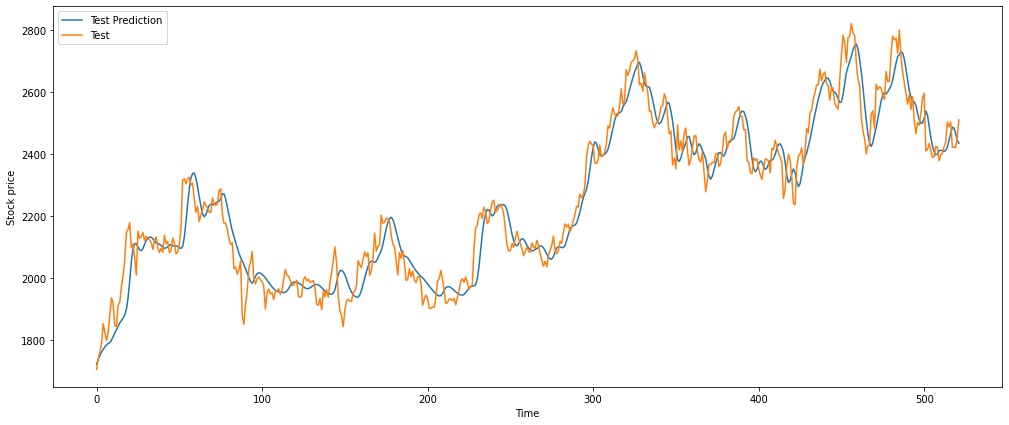

In [ ]:
plt.figure(figsize=(17,7))
plt.plot(original_y_pred_test,label="Test Prediction")
plt.plot(original_y_test,label="Test")
plt.xlabel("Time")
plt.ylabel("Stock price")
plt.legend()
plt.show()

In [ ]:
test.shape

(522, 2)

In [ ]:
y_pred_test_df=pd.DataFrame(original_y_pred_test,columns=["Test_Predictions"],index=test.index)
y_pred_test_df

,Test_Predictions
2087,1720.920166
2088,1735.812622
2089,1749.129639
2090,1760.027832
2091,1768.993408
...,...
2604,2485.783447
2605,2482.813965
2606,2464.583496
2607,2442.706299


In [ ]:
test_df=pd.DataFrame(original_y_test,columns=["Test_values"],index=test.index)
test_df

,Test_values
2087,1704.099976
2088,1737.599976
2089,1760.349976
2090,1787.900024
2091,1851.800049
...,...
2604,2420.399902
2605,2421.500000
2606,2419.199951
2607,2457.100098


In [ ]:
final_test_df=test_df.join(y_pred_test_df)
final_test_df

,Test_values,Test_Predictions
2087,1704.099976,1720.920166
2088,1737.599976,1735.812622
2089,1760.349976,1749.129639
2090,1787.900024,1760.027832
2091,1851.800049,1768.993408
...,...,...
2604,2420.399902,2485.783447
2605,2421.500000,2482.813965
2606,2419.199951,2464.583496
2607,2457.100098,2442.706299


In [ ]:
final_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 2087 to 2608
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Test_values       522 non-null    float64
 1   Test_Predictions  522 non-null    float32
dtypes: float32(1), float64(1)
memory usage: 6.2 KB


In [ ]:
fig=px.line(final_test_df,x=final_test_df.index,y=final_test_df.columns[0:2],labels={"Price":"Numbers"})
fig.show()

In [ ]:
RMSE=RMSE(final_test_df.Test_values,final_test_df.Test_Predictions)
RMSE

64.43183131663825

In [ ]:
MAPE=MAPE (final_test_df.Test_values,final_test_df.Test_Predictions)
MAPE

2.2379218246852974

## Appying model on whole dataset

In [ ]:
scaled_data

array([[0.0060693 ],
       [0.00967698],
       [0.00798277],
       ...,
       [0.83877092],
       [0.85402264],
       [0.8750892 ]])

In [ ]:
X=[]
Y=[]

for i in range(20,len(scaled_data)):
  X.append(scaled_data[i-20:i])
  Y.append(scaled_data[i,0])

X,Y=np.array(X),np.array(Y)

In [ ]:
X.shape,Y.shape,scaled_data.shape

((2589, 20, 1), (2589,), (2609, 1))

In [ ]:
1869-20

1849

In [ ]:
X

array([[[0.0060693 ],
        [0.00967698],
        [0.00798277],
        ...,
        [0.02289191],
        [0.02876188],
        [0.02364932]],

       [[0.00967698],
        [0.00798277],
        [0.00466409],
        ...,
        [0.02876188],
        [0.02364932],
        [0.02810412]],

       [[0.00798277],
        [0.00466409],
        [0.00826181],
        ...,
        [0.02364932],
        [0.02810412],
        [0.03091453]],

       ...,

       [[0.90354018],
        [0.90977766],
        [0.83454552],
        ...,
        [0.8725339 ],
        [0.8392538 ],
        [0.8396965 ]],

       [[0.90977766],
        [0.83454552],
        [0.83655761],
        ...,
        [0.8392538 ],
        [0.8396965 ],
        [0.83877092]],

       [[0.83454552],
        [0.83655761],
        [0.84442492],
        ...,
        [0.8396965 ],
        [0.83877092],
        [0.85402264]]])

In [ ]:
y_pred=model.predict(X)
y_pred

array([[0.05011825],
       [0.05121358],
       [0.0523624 ],
       ...,
       [0.85067976],
       [0.84310734],
       [0.8411233 ]], dtype=float32)

In [ ]:
y_pred.shape

(2589, 1)

In [ ]:
Y

array([0.02810412, 0.03091453, 0.03052585, ..., 0.83877092, 0.85402264,
       0.8750892 ])

In [ ]:
y_df=pd.DataFrame(Y,columns=["Close"])
y_df.head(2)

,Close
0,0.028104
1,0.030915


In [ ]:
Actual_y=scaler.inverse_transform(y_df)
Actual_y

array([[1571.78985793],
       [1575.39884545],
       [1574.89972663],
       ...,
       [2612.80774536],
       [2632.39325044],
       [2659.44587206]])

In [ ]:
y_pred

array([[0.05011825],
       [0.05121358],
       [0.0523624 ],
       ...,
       [0.85067976],
       [0.84310734],
       [0.8411233 ]], dtype=float32)

In [ ]:
y_pred_df=pd.DataFrame(y_pred,columns=["Predicted_y"])
y_pred_df

,Predicted_y
0,0.050118
1,0.051214
2,0.052362
3,0.053533
4,0.054679
...,...
2584,0.860725
2585,0.858206
2586,0.850680
2587,0.843107


In [ ]:
predicted_y=scaler.inverse_transform(y_pred_df)
predicted_y

array([[1600.0592],
       [1601.466 ],
       [1602.9412],
       ...,
       [2628.1006],
       [2618.3765],
       [2615.8284]], dtype=float32)

In [ ]:
s=series[20:]
s

,Date,Close
20,2012-01-31,404.713715
21,2012-02-01,411.697510
22,2012-02-02,410.731659
23,2012-02-03,415.214172
24,2012-02-06,412.589081
...,...,...
2604,2022-07-25,2420.399902
2605,2022-07-26,2421.500000
2606,2022-07-27,2419.199951
2607,2022-07-28,2457.100098


In [ ]:
y_pred_df=pd.DataFrame(predicted_y,columns=["Predictions"])
y_pred_df

,Predictions
0,1600.059204
1,1601.465942
2,1602.941162
3,1604.443726
4,1605.916626
...,...
2584,2640.999756
2585,2637.765137
2586,2628.100586
2587,2618.376465


In [ ]:
Y_df=pd.DataFrame(Actual_y,columns=["Actual"])
Y_df

,Actual
0,1571.789858
1,1575.398845
2,1574.899727
3,1577.216137
4,1575.859579
...,...
2584,2613.427839
2585,2613.996332
2586,2612.807745
2587,2632.393250


In [ ]:
final_prediction_df=Y_df.join(y_pred_df)
final_prediction_df

,Actual,Predictions
0,1571.789858,1600.059204
1,1575.398845,1601.465942
2,1574.899727,1602.941162
3,1577.216137,1604.443726
4,1575.859579,1605.916626
...,...,...
2584,2613.427839,2640.999756
2585,2613.996332,2637.765137
2586,2612.807745,2628.100586
2587,2632.393250,2618.376465


In [ ]:
fig=px.line(final_prediction_df,x=final_prediction_df.index,y=final_prediction_df.columns[0:2],labels={"Price":"Numbers"})
fig.show()

In [ ]:
#RMSE1=RMSE(final_prediction_df.Actual,final_prediction_df.Predictions)
#RMSE1

In [ ]:
#MAPE=MAPE(final_prediction_df.Predictions,final_prediction_df.Actual)
#MAPE

## Prediction of new data points

In [ ]:
#get the quote
data=yf.download(tickers,start="2015-01-01")
data
#create new dataframe
new_df = data.filter(['Close'])
#get the last 100 days close price value and covert the data frame into array
last_20_days = new_df[-20:].values
#scale the values between 0 to 1
last_20_days_scaled = scaler.transform(last_20_days)
#create empty list
x_test = []
#append the past 100 days 
x_test.append(last_20_days_scaled)
#convert the x test data into numpy array
x_test = np.array(x_test)
#reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
#get the predicted scaled price 
pred_price = model.predict(x_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
[[2444.5781]]


In [ ]:
type(pred_price)

numpy.ndarray

In [ ]:
data1=yf.download(tickers,start="2022-07-28")
data1

print(data1['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2022-07-28    2457.100098
2022-07-29    2509.449951
Name: Close, dtype: float64


In [ ]:
last_20_days = new_df[-20:].values
last_20_days

array([[2413.69995117],
       [2433.25      ],
       [2411.85009766],
       [2388.10009766],
       [2391.39990234],
       [2423.89990234],
       [2420.44995117],
       [2377.55004883],
       [2397.14990234],
       [2401.80004883],
       [2422.25      ],
       [2437.10009766],
       [2503.        ],
       [2486.30004883],
       [2503.10009766],
       [2420.39990234],
       [2421.5       ],
       [2419.19995117],
       [2457.10009766],
       [2509.44995117]])

In [ ]:
new_predictions=new_df.tail(20).values  #dates= 29-06-2022  - 26-07-2022
new_predictions

array([[2413.69995117],
       [2433.25      ],
       [2411.85009766],
       [2388.10009766],
       [2391.39990234],
       [2423.89990234],
       [2420.44995117],
       [2377.55004883],
       [2397.14990234],
       [2401.80004883],
       [2422.25      ],
       [2437.10009766],
       [2503.        ],
       [2486.30004883],
       [2503.10009766],
       [2420.39990234],
       [2421.5       ],
       [2419.19995117],
       [2457.10009766],
       [2509.44995117]])

In [ ]:
new_predictions=np.array(new_predictions)

In [ ]:
type(new_predictions)

numpy.ndarray

In [ ]:
new_pred_df=pd.DataFrame(new_predictions,columns=["new_Predictions"])
new_pred_df

,new_Predictions
0,2413.699951
1,2433.250000
2,2411.850098
3,2388.100098
4,2391.399902
5,2423.899902
6,2420.449951
7,2377.550049
8,2397.149902
9,2401.800049


In [ ]:
new_val=pred_price.tolist()
new_val

[[2444.578125]]

In [ ]:
type(new_val)

list

In [ ]:
#new_pewdictions.extend(pred_price)
new_arr = np.append(new_predictions, pred_price)
new_arr

array([2413.69995117, 2433.25      , 2411.85009766, 2388.10009766,
       2391.39990234, 2423.89990234, 2420.44995117, 2377.55004883,
       2397.14990234, 2401.80004883, 2422.25      , 2437.10009766,
       2503.        , 2486.30004883, 2503.10009766, 2420.39990234,
       2421.5       , 2419.19995117, 2457.10009766, 2509.44995117,
       2444.578125  ])

In [ ]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])

In [ ]:
last_20_days = new_arr_df[-20:].values
last_20_days_scaled = scaler.transform(last_20_days)
x_test = []
x_test.append(last_20_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[2454.5923]]


In [ ]:
new_arr = np.append(new_arr, pred_price)
new_arr

array([2413.69995117, 2433.25      , 2411.85009766, 2388.10009766,
       2391.39990234, 2423.89990234, 2420.44995117, 2377.55004883,
       2397.14990234, 2401.80004883, 2422.25      , 2437.10009766,
       2503.        , 2486.30004883, 2503.10009766, 2420.39990234,
       2421.5       , 2419.19995117, 2457.10009766, 2509.44995117,
       2444.578125  , 2454.59228516])

In [ ]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])
new_arr_df

,Pred
0,2413.699951
1,2433.250000
2,2411.850098
3,2388.100098
4,2391.399902
5,2423.899902
6,2420.449951
7,2377.550049
8,2397.149902
9,2401.800049


In [ ]:
last_20_days = new_arr_df[-20:].values
last_20_days_scaled = scaler.transform(last_20_days)
x_test = []
x_test.append(last_20_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[2460.726]]


In [ ]:
new_arr = np.append(new_arr, pred_price)
new_arr

array([2413.69995117, 2433.25      , 2411.85009766, 2388.10009766,
       2391.39990234, 2423.89990234, 2420.44995117, 2377.55004883,
       2397.14990234, 2401.80004883, 2422.25      , 2437.10009766,
       2503.        , 2486.30004883, 2503.10009766, 2420.39990234,
       2421.5       , 2419.19995117, 2457.10009766, 2509.44995117,
       2444.578125  , 2454.59228516, 2460.72607422])

In [ ]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])
new_arr_df

,Pred
0,2413.699951
1,2433.250000
2,2411.850098
3,2388.100098
4,2391.399902
5,2423.899902
6,2420.449951
7,2377.550049
8,2397.149902
9,2401.800049


In [ ]:
last_20_days = new_arr_df[-20:].values
last_20_days_scaled = scaler.transform(last_20_days)
x_test = []
x_test.append(last_20_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[2464.5217]]


In [ ]:
new_arr = np.append(new_arr, pred_price)
new_arr

array([2413.69995117, 2433.25      , 2411.85009766, 2388.10009766,
       2391.39990234, 2423.89990234, 2420.44995117, 2377.55004883,
       2397.14990234, 2401.80004883, 2422.25      , 2437.10009766,
       2503.        , 2486.30004883, 2503.10009766, 2420.39990234,
       2421.5       , 2419.19995117, 2457.10009766, 2509.44995117,
       2444.578125  , 2454.59228516, 2460.72607422, 2464.52172852])

In [ ]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])
new_arr_df

,Pred
0,2413.699951
1,2433.250000
2,2411.850098
3,2388.100098
4,2391.399902
5,2423.899902
6,2420.449951
7,2377.550049
8,2397.149902
9,2401.800049


In [ ]:
last_20_days = new_arr_df[-20:].values
last_20_days_scaled = scaler.transform(last_20_days)
x_test = []
x_test.append(last_20_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[2467.7058]]


In [ ]:
new_arr = np.append(new_arr, pred_price)
new_arr

array([2413.69995117, 2433.25      , 2411.85009766, 2388.10009766,
       2391.39990234, 2423.89990234, 2420.44995117, 2377.55004883,
       2397.14990234, 2401.80004883, 2422.25      , 2437.10009766,
       2503.        , 2486.30004883, 2503.10009766, 2420.39990234,
       2421.5       , 2419.19995117, 2457.10009766, 2509.44995117,
       2444.578125  , 2454.59228516, 2460.72607422, 2464.52172852,
       2467.70581055])

In [ ]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])
new_arr_df

,Pred
0,2413.699951
1,2433.250000
2,2411.850098
3,2388.100098
4,2391.399902
5,2423.899902
6,2420.449951
7,2377.550049
8,2397.149902
9,2401.800049


In [ ]:
last_20_days = new_arr_df[-20:].values
last_20_days_scaled = scaler.transform(last_20_days)
x_test = []
x_test.append(last_20_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[2470.6191]]


In [ ]:
new_arr = np.append(new_arr, pred_price)
new_arr

array([2413.69995117, 2433.25      , 2411.85009766, 2388.10009766,
       2391.39990234, 2423.89990234, 2420.44995117, 2377.55004883,
       2397.14990234, 2401.80004883, 2422.25      , 2437.10009766,
       2503.        , 2486.30004883, 2503.10009766, 2420.39990234,
       2421.5       , 2419.19995117, 2457.10009766, 2509.44995117,
       2444.578125  , 2454.59228516, 2460.72607422, 2464.52172852,
       2467.70581055, 2470.61914062])

In [ ]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])
new_arr_df

,Pred
0,2413.699951
1,2433.250000
2,2411.850098
3,2388.100098
4,2391.399902
5,2423.899902
6,2420.449951
7,2377.550049
8,2397.149902
9,2401.800049


In [ ]:
last_20_days = new_arr_df[-20:].values
last_20_days_scaled = scaler.transform(last_20_days)
x_test = []
x_test.append(last_20_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[2473.165]]


In [ ]:
new_arr = np.append(new_arr, pred_price)
new_arr

array([2413.69995117, 2433.25      , 2411.85009766, 2388.10009766,
       2391.39990234, 2423.89990234, 2420.44995117, 2377.55004883,
       2397.14990234, 2401.80004883, 2422.25      , 2437.10009766,
       2503.        , 2486.30004883, 2503.10009766, 2420.39990234,
       2421.5       , 2419.19995117, 2457.10009766, 2509.44995117,
       2444.578125  , 2454.59228516, 2460.72607422, 2464.52172852,
       2467.70581055, 2470.61914062, 2473.16503906])

In [ ]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])
new_arr_df

,Pred
0,2413.699951
1,2433.250000
2,2411.850098
3,2388.100098
4,2391.399902
5,2423.899902
6,2420.449951
7,2377.550049
8,2397.149902
9,2401.800049


In [ ]:
last_20_days = new_arr_df[-20:].values
last_20_days_scaled = scaler.transform(last_20_days)
x_test = []
x_test.append(last_20_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[2475.3962]]


In [ ]:
new_arr = np.append(new_arr, pred_price)
new_arr

array([2413.69995117, 2433.25      , 2411.85009766, 2388.10009766,
       2391.39990234, 2423.89990234, 2420.44995117, 2377.55004883,
       2397.14990234, 2401.80004883, 2422.25      , 2437.10009766,
       2503.        , 2486.30004883, 2503.10009766, 2420.39990234,
       2421.5       , 2419.19995117, 2457.10009766, 2509.44995117,
       2444.578125  , 2454.59228516, 2460.72607422, 2464.52172852,
       2467.70581055, 2470.61914062, 2473.16503906, 2475.39624023])

In [ ]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])
new_arr_df

,Pred
0,2413.699951
1,2433.250000
2,2411.850098
3,2388.100098
4,2391.399902
5,2423.899902
6,2420.449951
7,2377.550049
8,2397.149902
9,2401.800049


In [ ]:
last_20_days = new_arr_df[-20:].values
last_20_days_scaled = scaler.transform(last_20_days)
x_test = []
x_test.append(last_20_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
new_arr = np.append(new_arr, pred_price)
new_arr

[[2477.6108]]


array([2413.69995117, 2433.25      , 2411.85009766, 2388.10009766,
       2391.39990234, 2423.89990234, 2420.44995117, 2377.55004883,
       2397.14990234, 2401.80004883, 2422.25      , 2437.10009766,
       2503.        , 2486.30004883, 2503.10009766, 2420.39990234,
       2421.5       , 2419.19995117, 2457.10009766, 2509.44995117,
       2444.578125  , 2454.59228516, 2460.72607422, 2464.52172852,
       2467.70581055, 2470.61914062, 2473.16503906, 2475.39624023,
       2477.61083984])

In [ ]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])
new_arr_df

,Pred
0,2413.699951
1,2433.250000
2,2411.850098
3,2388.100098
4,2391.399902
5,2423.899902
6,2420.449951
7,2377.550049
8,2397.149902
9,2401.800049


In [ ]:
last_20_days = new_arr_df[-20:].values
last_20_days_scaled = scaler.transform(last_20_days)
x_test = []
x_test.append(last_20_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
new_arr = np.append(new_arr, pred_price)
new_arr

[[2479.9614]]


array([2413.69995117, 2433.25      , 2411.85009766, 2388.10009766,
       2391.39990234, 2423.89990234, 2420.44995117, 2377.55004883,
       2397.14990234, 2401.80004883, 2422.25      , 2437.10009766,
       2503.        , 2486.30004883, 2503.10009766, 2420.39990234,
       2421.5       , 2419.19995117, 2457.10009766, 2509.44995117,
       2444.578125  , 2454.59228516, 2460.72607422, 2464.52172852,
       2467.70581055, 2470.61914062, 2473.16503906, 2475.39624023,
       2477.61083984, 2479.96142578])

In [ ]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])
new_arr_df

,Pred
0,2413.699951
1,2433.250000
2,2411.850098
3,2388.100098
4,2391.399902
5,2423.899902
6,2420.449951
7,2377.550049
8,2397.149902
9,2401.800049


In [ ]:
last_20_days = new_arr_df[-20:].values
last_20_days_scaled = scaler.transform(last_20_days)
x_test = []
x_test.append(last_20_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
new_arr = np.append(new_arr, pred_price)
new_arr

[[2482.3296]]


array([2413.69995117, 2433.25      , 2411.85009766, 2388.10009766,
       2391.39990234, 2423.89990234, 2420.44995117, 2377.55004883,
       2397.14990234, 2401.80004883, 2422.25      , 2437.10009766,
       2503.        , 2486.30004883, 2503.10009766, 2420.39990234,
       2421.5       , 2419.19995117, 2457.10009766, 2509.44995117,
       2444.578125  , 2454.59228516, 2460.72607422, 2464.52172852,
       2467.70581055, 2470.61914062, 2473.16503906, 2475.39624023,
       2477.61083984, 2479.96142578, 2482.32958984])

In [ ]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])
new_arr_df

,Pred
0,2413.699951
1,2433.250000
2,2411.850098
3,2388.100098
4,2391.399902
5,2423.899902
6,2420.449951
7,2377.550049
8,2397.149902
9,2401.800049


In [ ]:
df2=new_df.tail(20)
df2

,Close
Date,
2022-07-04,2413.699951
2022-07-05,2433.250000
2022-07-06,2411.850098
2022-07-07,2388.100098
2022-07-08,2391.399902
2022-07-11,2423.899902
2022-07-12,2420.449951
2022-07-13,2377.550049
2022-07-14,2397.149902


In [ ]:
df2=pd.DataFrame(df2.values,columns=["Actual"])
df2

,Actual
0,2413.699951
1,2433.250000
2,2411.850098
3,2388.100098
4,2391.399902
5,2423.899902
6,2420.449951
7,2377.550049
8,2397.149902
9,2401.800049


In [ ]:
future_pred=new_arr_df[20:]
future_pred

,Pred
20,2444.578125
21,2454.592285
22,2460.726074
23,2464.521729
24,2467.705811
25,2470.619141
26,2473.165039
27,2475.396240
28,2477.610840
29,2479.961426


In [ ]:
series.tail()

,Date,Close
2604,2022-07-25,2420.399902
2605,2022-07-26,2421.500000
2606,2022-07-27,2419.199951
2607,2022-07-28,2457.100098
2608,2022-07-29,2509.449951


In [ ]:
np.arange((len(series)),(len(series)+11))

array([2609, 2610, 2611, 2612, 2613, 2614, 2615, 2616, 2617, 2618])

In [ ]:
series_future_df=future_pred.set_index(np.arange((len(series)),(len(series)+11)))
series_future_df

,Pred
2609,2444.578125
2610,2454.592285
2611,2460.726074
2612,2464.521729
2613,2467.705811
2614,2470.619141
2615,2473.165039
2616,2475.396240
2617,2477.610840
2618,2479.961426


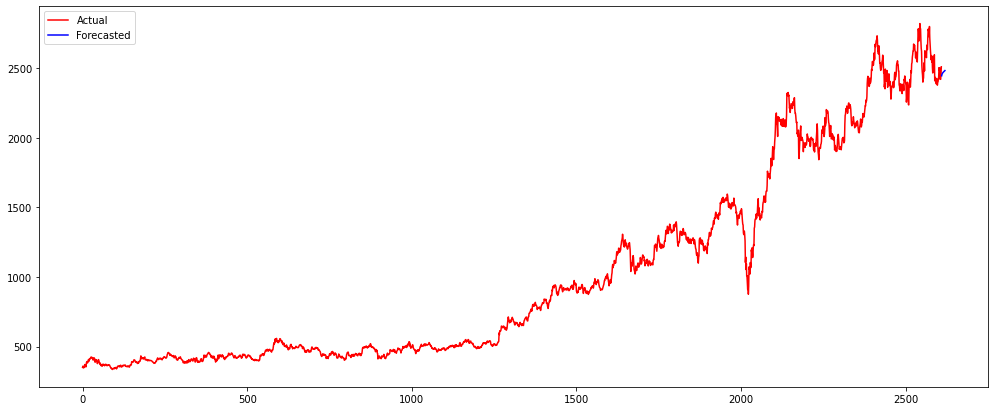

In [ ]:
plt.figure(figsize=(17,7))
plt.plot(series.Close,label="Actual",color="red")
plt.plot(series_future_df,label="Forecasted",color="blue")
plt.legend()
plt.show()

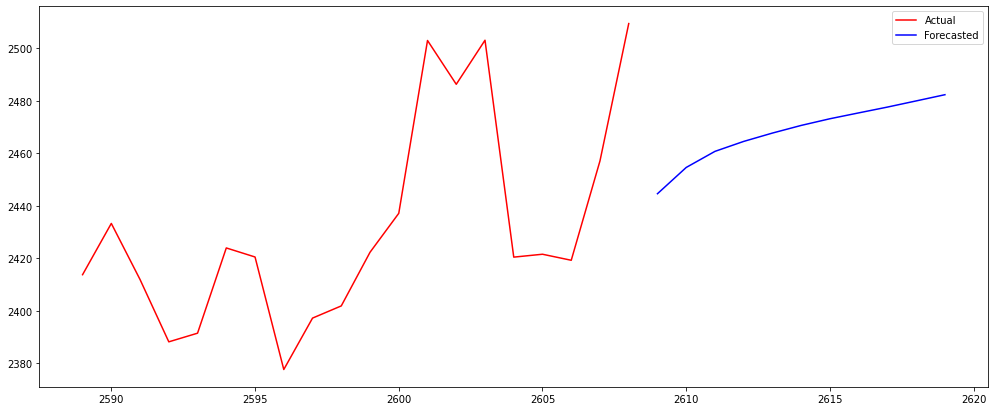

In [ ]:
plt.figure(figsize=(17,7))
plt.plot(series[["Close"]].tail(20),label="Actual",color="red")
plt.plot(series_future_df,label="Forecasted",color="blue")
plt.legend()
plt.show()